In [30]:
import pandas as pd
import datetime
from pathlib import Path

import os
datadir = Path("../Data/").resolve().absolute()
print(datadir)
# currency = "BTCUSD"
forecasts_by_last_modified = sorted([f for f in datadir.glob("*_training_forecast.csv")], key=os.path.getmtime, reverse=True)
print(forecasts_by_last_modified)
currency = forecasts_by_last_modified[0].name.split("_")[0]
today = datetime.datetime.now().strftime("%Y_%m_%d")


C:\Users\karan\source\csharp\Crypto-Price-Forecaster\TrainerCLI\Data
[WindowsPath('C:/Users/karan/source/csharp/Crypto-Price-Forecaster/TrainerCLI/Data/BTCUSD_training_forecast.csv'), WindowsPath('C:/Users/karan/source/csharp/Crypto-Price-Forecaster/TrainerCLI/Data/ETHUSD_training_forecast.csv'), WindowsPath('C:/Users/karan/source/csharp/Crypto-Price-Forecaster/TrainerCLI/Data/XMRUSD_training_forecast.csv')]


In [31]:
# Parse main file data into df
from datetime import datetime

dateparse = lambda x: datetime.strptime(x, "%Y-%m-%d")
main_file = datadir / f"{currency}.csv"

maindf = pd.read_csv(main_file, parse_dates=['Date'], date_parser=dateparse)

# Only keep two columns, and reverse the dataset (old to new)
maindf = maindf[["Date", "Last"]][::-1]

print(maindf)


           Date          Last
2701 2014-04-15    505.000000
2700 2014-04-16    538.000000
2699 2014-04-17    508.000000
2698 2014-04-18    482.750000
2697 2014-04-19    507.499900
...         ...           ...
4    2021-10-20  65949.719666
3    2021-10-21  62534.000000
2    2021-10-22  60742.000000
1    2021-10-23  61034.680000
0    2021-10-24  60318.000000

[2702 rows x 2 columns]


<AxesSubplot:xlabel='Date', ylabel='Last'>

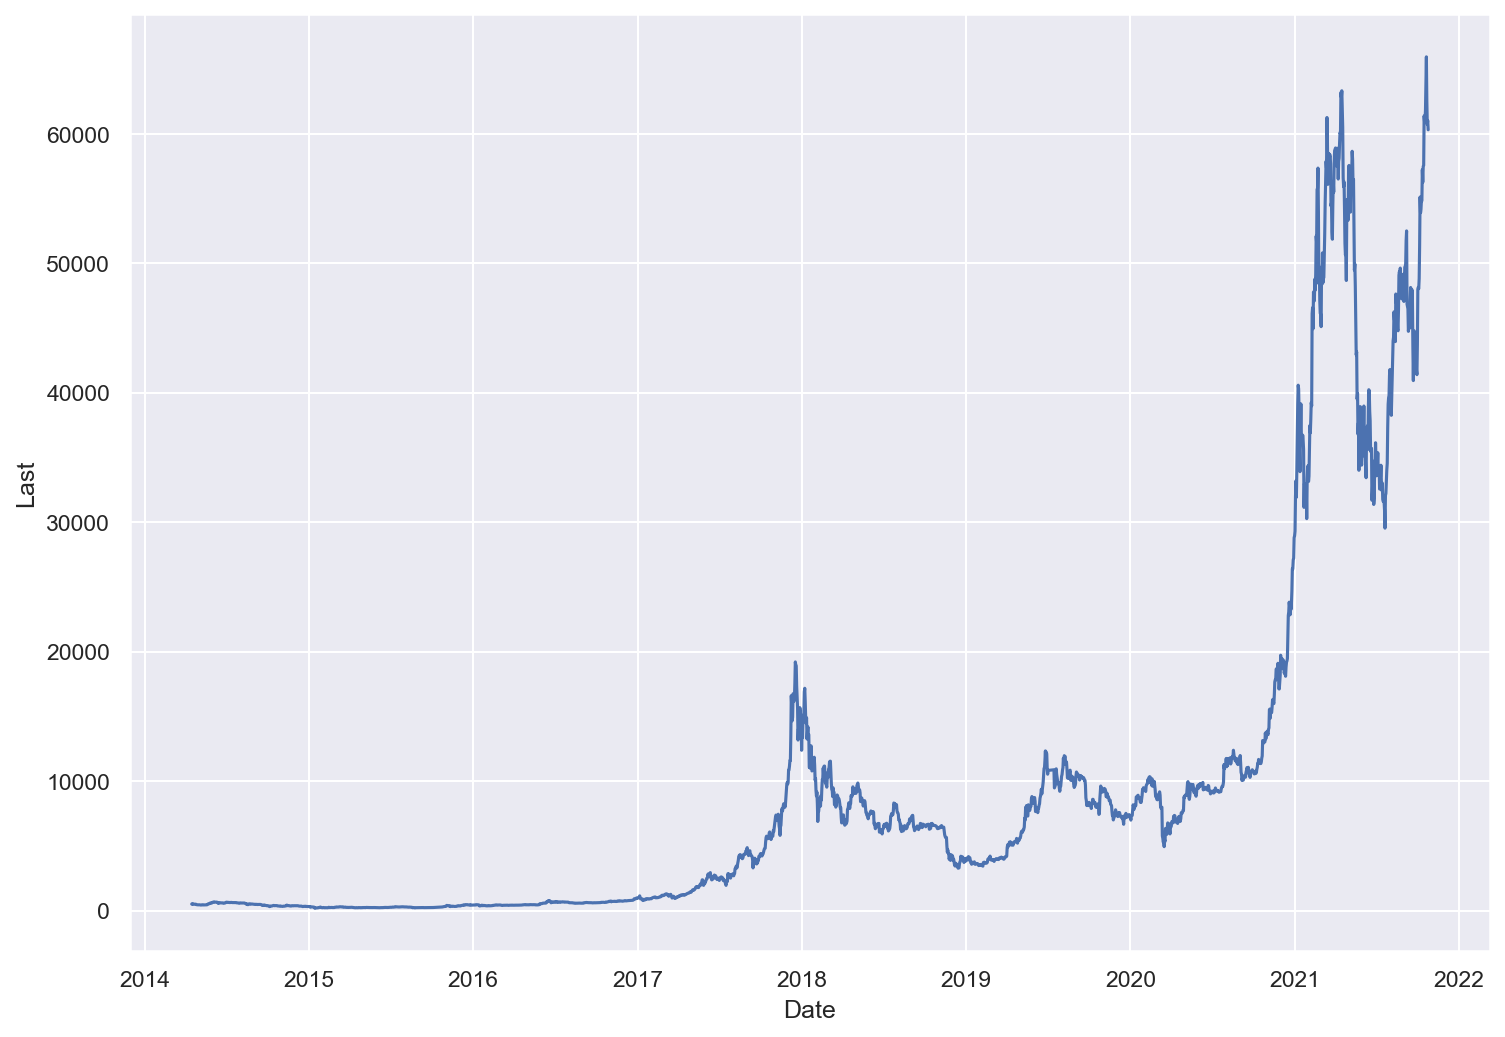

In [32]:
# Plot the main data
import seaborn as sns

from matplotlib import pyplot as plt
import seaborn as sns    

sns.set(rc={'figure.figsize':(11.7,8.27), 'figure.dpi': 150})

sns.lineplot(
    data=maindf, x="Date", y="Last", sort=False
)


In [33]:
testing_split = datadir / f"{currency}_testing_split.csv"
testdf = pd.read_csv(testing_split, parse_dates=['Date'], date_parser=dateparse)
print(testdf)

train_split = datadir / f"{currency}_training_split.csv"
traindf = pd.read_csv(train_split, parse_dates=['Date'], date_parser=dateparse)
print(traindf)


        Date      Last
0 2021-10-20  65949.72
1 2021-10-21  62534.00
2 2021-10-22  60742.00
3 2021-10-23  61034.68
4 2021-10-24  60318.00
           Date        Last
0    2014-04-15    505.0000
1    2014-04-16    538.0000
2    2014-04-17    508.0000
3    2014-04-18    482.7500
4    2014-04-19    507.4999
...         ...         ...
2697 2021-10-20  65949.7200
2698 2021-10-21  62534.0000
2699 2021-10-22  60742.0000
2700 2021-10-23  61034.6800
2701 2021-10-24  60318.0000

[2702 rows x 2 columns]


<AxesSubplot:xlabel='Date', ylabel='Last'>

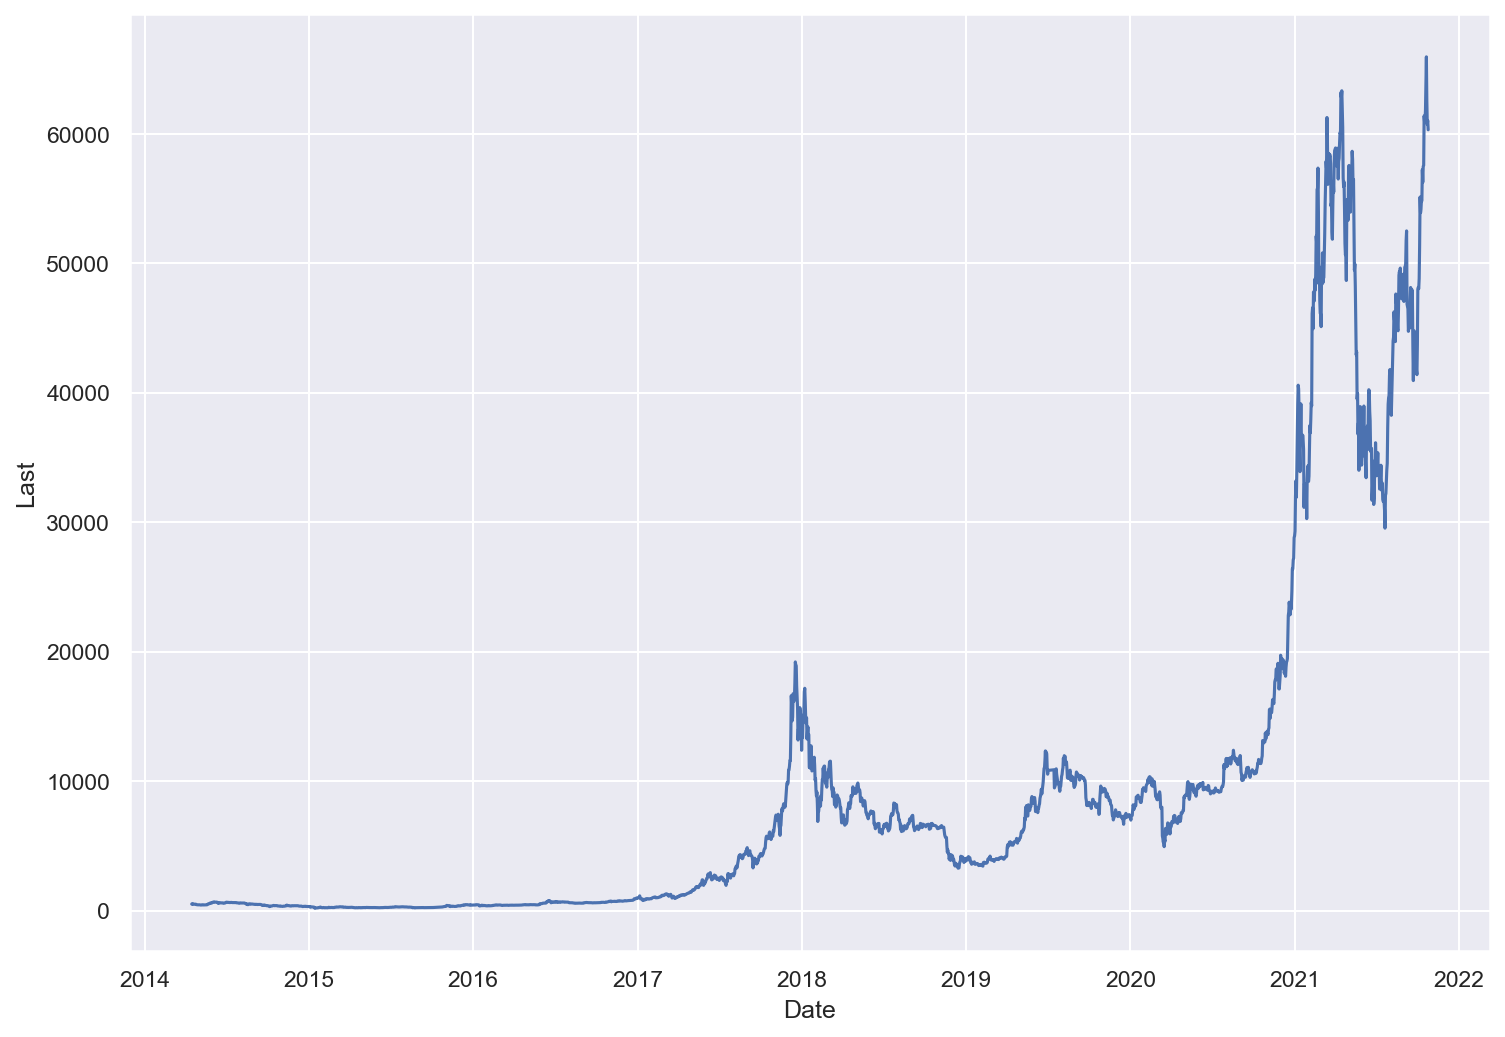

In [34]:
sns.lineplot(
    data=traindf, x="Date", y="Last", sort=False
)

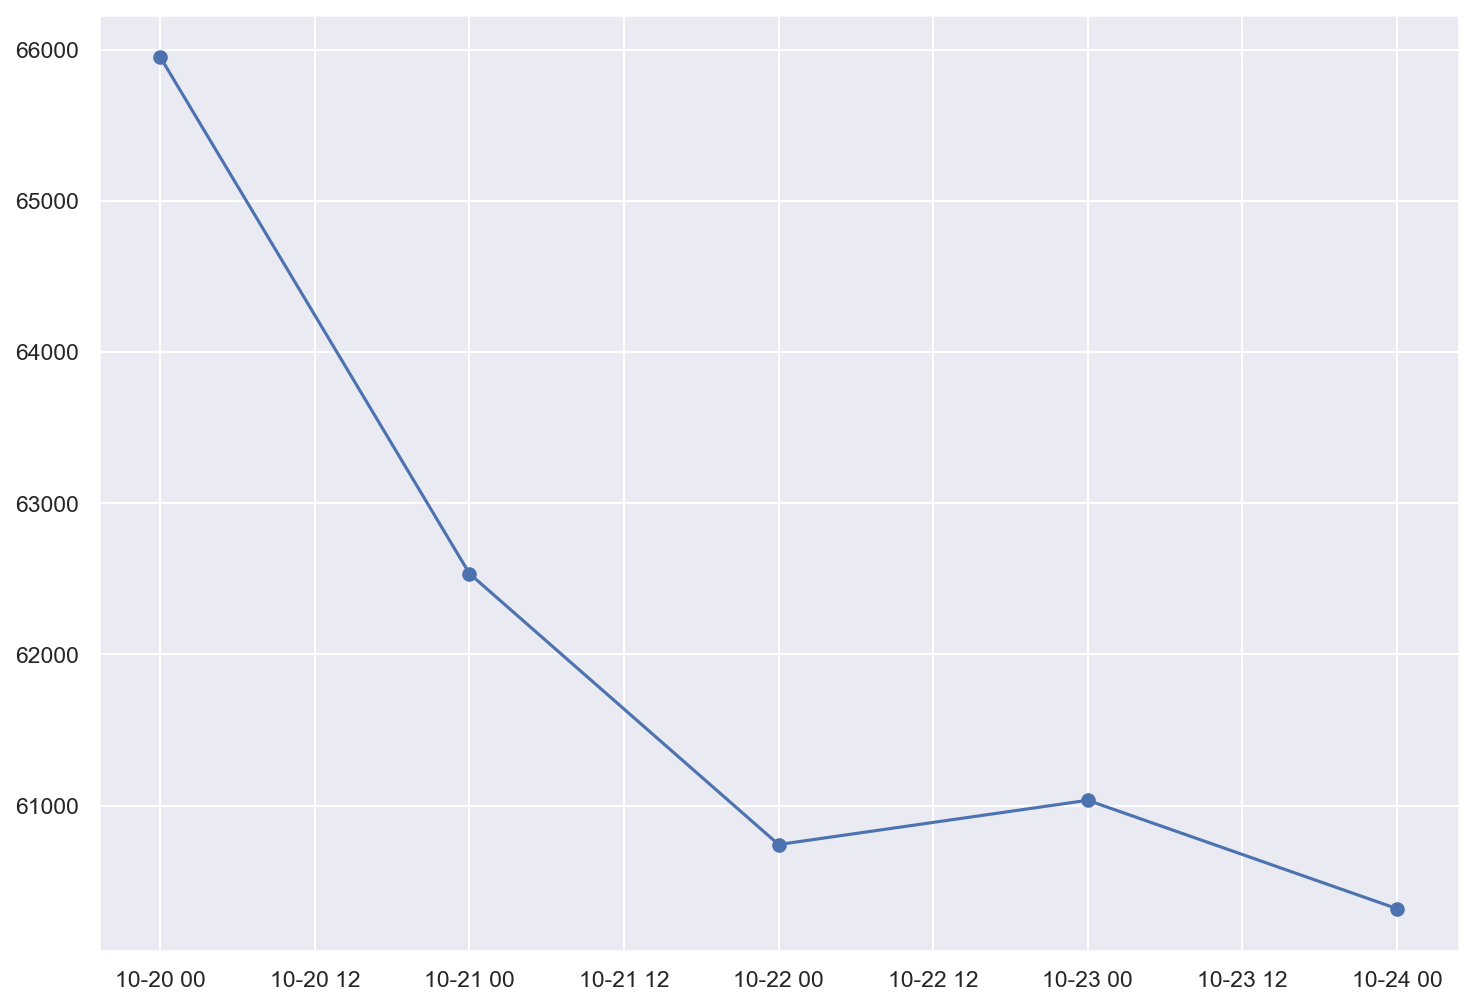

In [35]:
plt.plot(testdf["Date"], testdf["Last"], marker='o')

In [36]:
train_forecast_file = datadir / f"{currency}_training_forecast.csv"
train_fc_df = pd.read_csv(train_forecast_file, parse_dates=['Date'], date_parser=dateparse)
print(train_fc_df)


        Date   Forecast  LowerBound  UpperBound  BoundsDifference
0 2021-10-20  63753.477   62565.887   64941.066       1187.589844
1 2021-10-21  61905.547   58082.758   65728.336       3822.789062
2 2021-10-22  61143.125   55618.180   66668.070       5524.945312
3 2021-10-23  61819.890   54882.793   68756.984       6937.095703
4 2021-10-24  61972.094   53720.920   70223.266       8251.171875


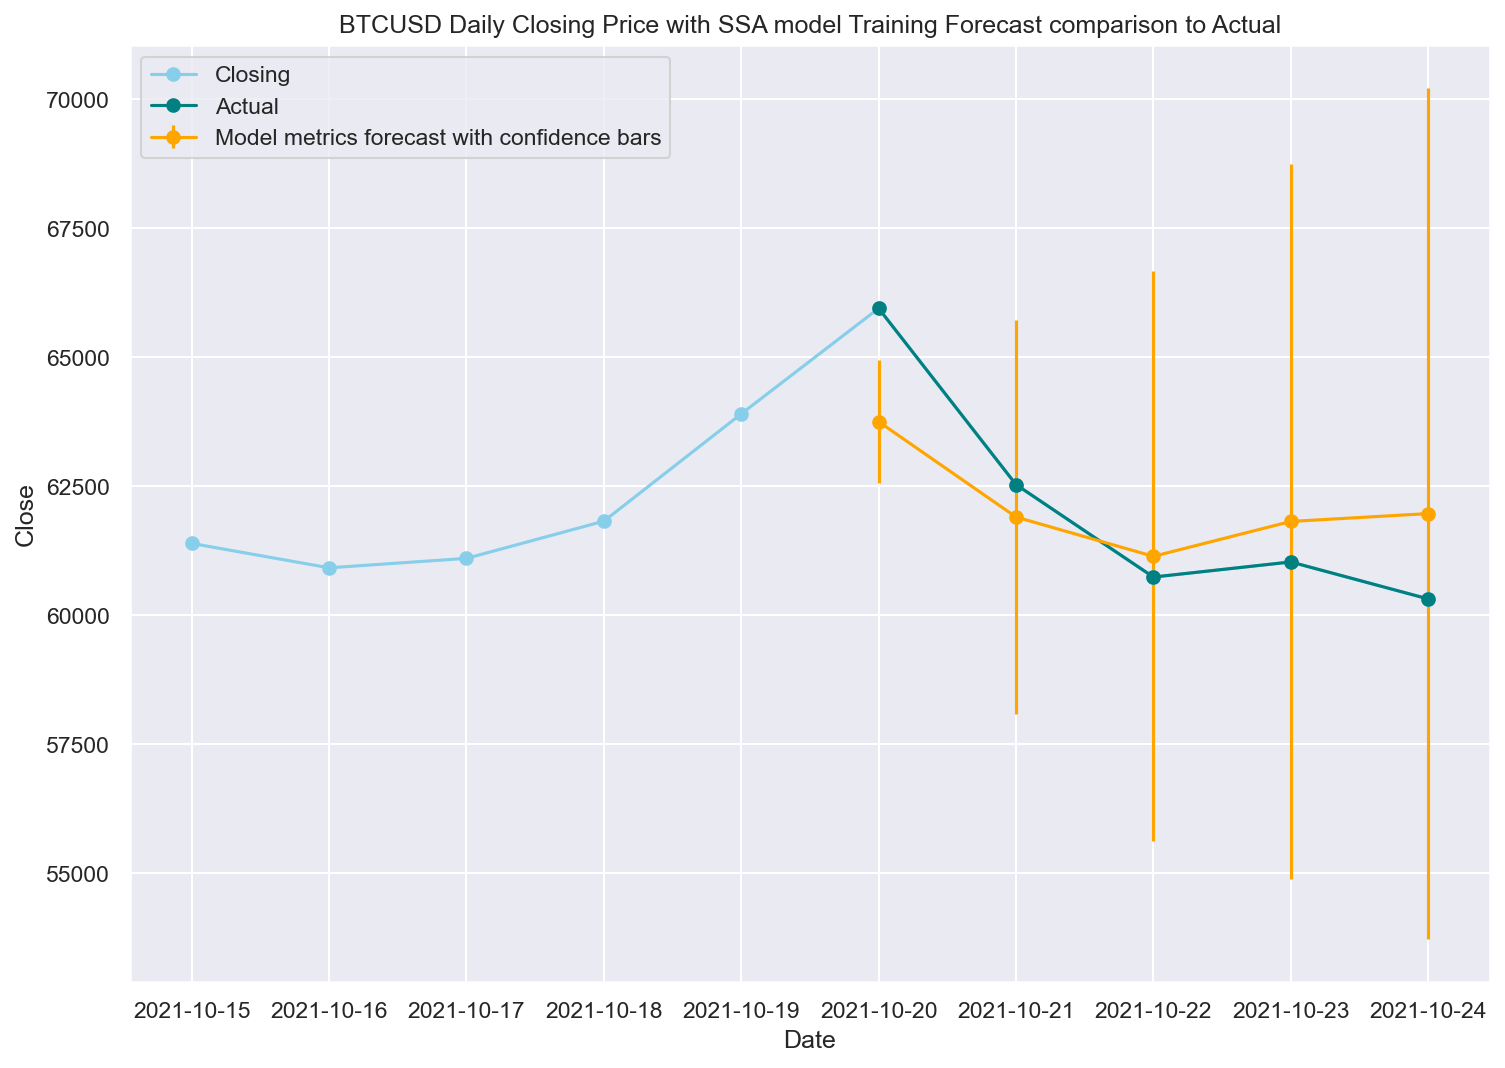

In [37]:

plt.title(f"{currency} Daily Closing Price with SSA model Training Forecast comparison to Actual")
plt.plot('Date', 'Last', data=traindf.tail(10), color="skyblue", marker='o', label="Closing")
plt.plot('Date', 'Last', data=testdf, marker='o', color='teal', label="Actual")
plt.errorbar('Date', 'Forecast', data=train_fc_df, marker='o', color='orange', label='Model metrics forecast with confidence bars', yerr=train_fc_df["BoundsDifference"])
plt.legend(loc='upper left')
plt.ylabel("Close")
plt.xlabel("Date")
plt.savefig(datadir / f'{currency}_training_forecast_{today}.png')
plt.show()

        Date   Forecast  LowerBound  UpperBound  BoundsDifference
0 2021-10-26  65899.680   64712.090   67087.270       1187.591797
1 2021-10-27  69704.090   65881.305   73526.880       3822.789062
2 2021-10-28  71570.195   66045.250   77095.140       5524.945312
3 2021-10-29  70933.640   63996.543   77870.734       6937.095703
4 2021-10-30  69390.200   61139.030   77641.375       8251.171875


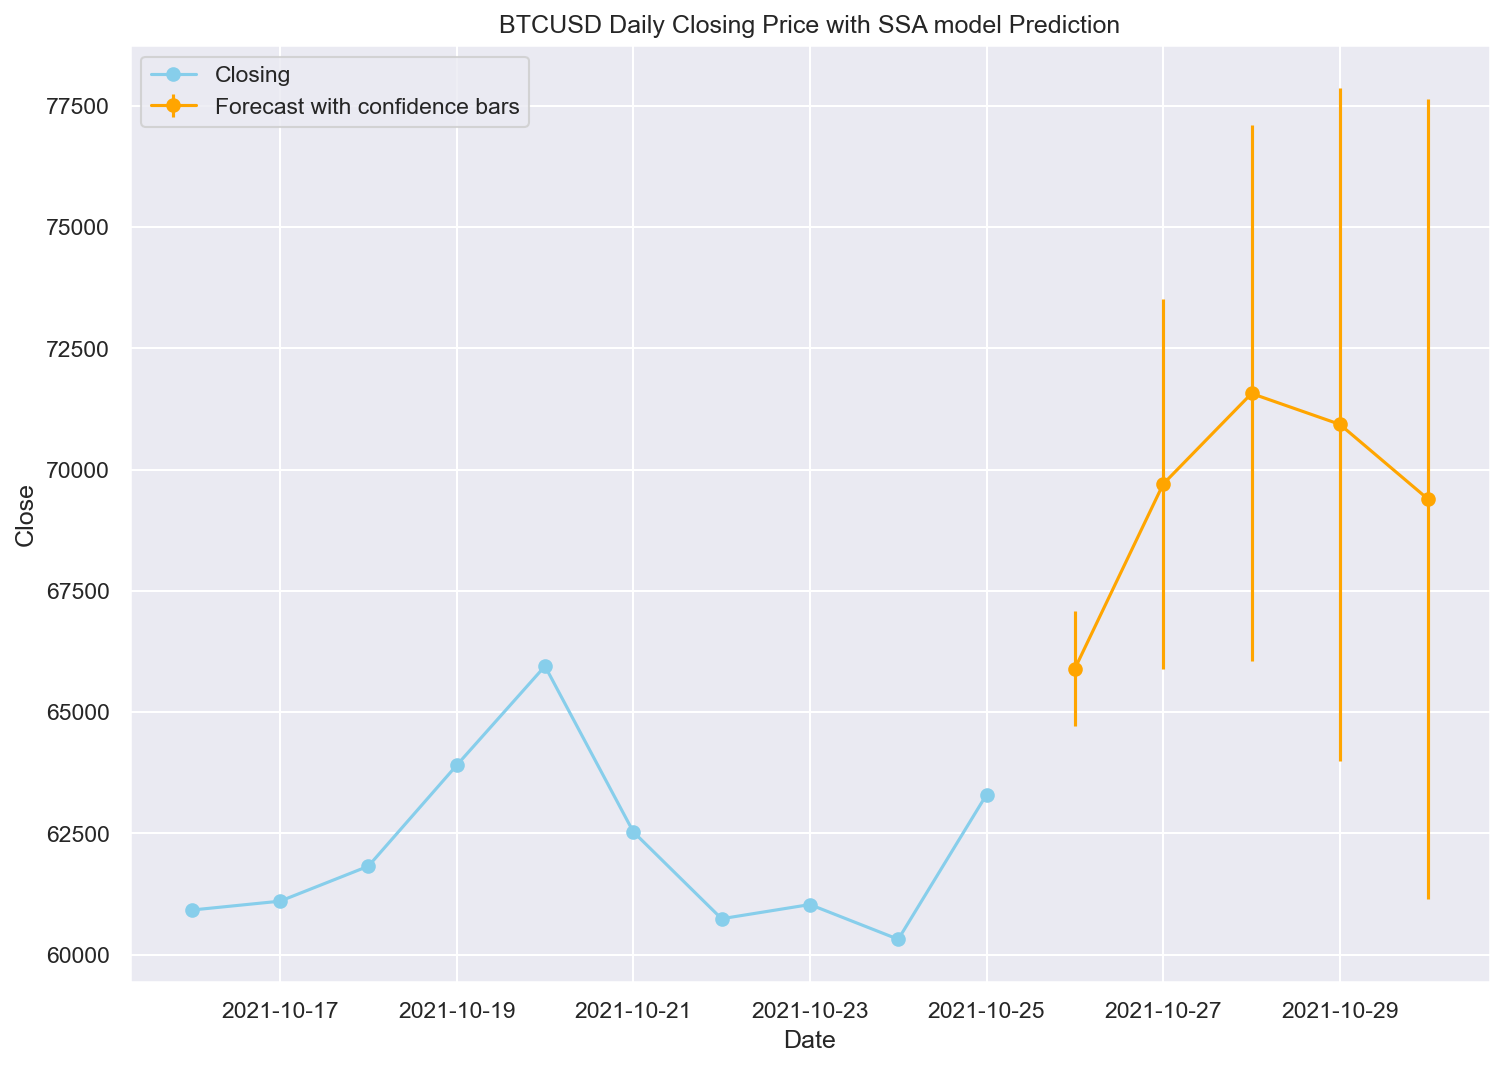

In [38]:

predict_dataset_file = datadir / f"{currency}_prediction_dataset.csv"
predict_forecast_file = datadir / f"{currency}_prediction_forecast.csv"

if (predict_dataset_file.is_file() and predict_forecast_file.is_file()):
    predict_df = pd.read_csv(predict_dataset_file, parse_dates=['Date'], date_parser=dateparse)
    predict_fc_df = pd.read_csv(predict_forecast_file, parse_dates=['Date'], date_parser=dateparse)
    print(predict_fc_df)
    # Only keep two columns, and reverse the dataset (old to new)
    predict_df = predict_df[["Date", "Last"]][::-1]

    plt.title(f"{currency} Daily Closing Price with SSA model Prediction")
    plt.errorbar('Date', 'Forecast', data=predict_fc_df, marker='o', color='orange', label='Forecast with confidence bars', yerr=predict_fc_df["BoundsDifference"])
    plt.plot('Date', 'Last', data=predict_df.tail(10), color="skyblue", marker='o', label="Closing")
    plt.legend(loc='upper left')
    plt.ylabel("Close")
    plt.xlabel("Date")
    plt.savefig(datadir / f'{currency}_prediction_{today}.png')
    plt.show()
